<a href="https://colab.research.google.com/github/YKXu-c/MachineLearning_pytorch_RL_DLExamples/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch workflow

We will explore an example PyTorch end-to-end workflow.

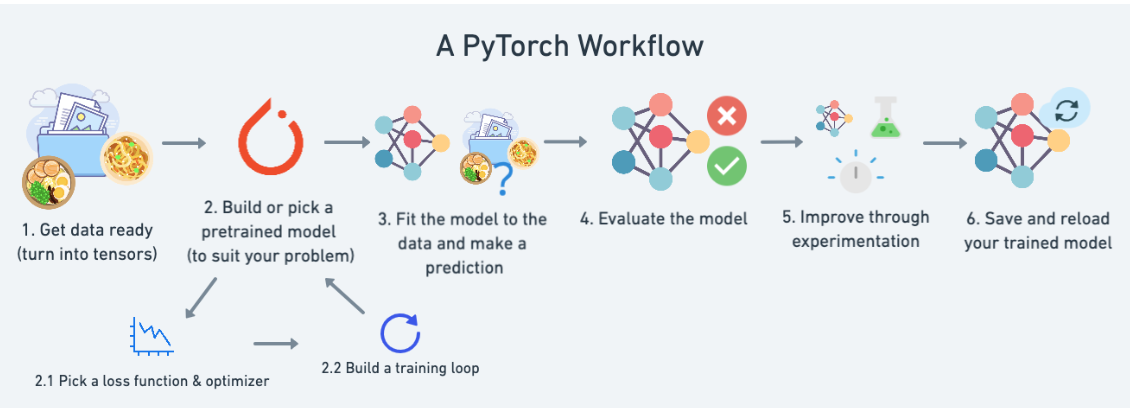

Resource:
[mrdbourke's Notebook](https://www.learnpytorch.io/01_pytorch_workflow/)

**Declaration**: Almost all beutiful pictures are from mrbourke's tutorial, thanks to him!


In [2]:
what_were_covering = {1: "data (prepare and load)",
            2: "build model",
            3: "fitting the model to data(training)",
            4: "making predictions and evaluting a model(inference)",
            5: "saving and loading a model",
            6: "putting it all together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'making predictions and evaluting a model(inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [3]:
import torch
from torch import nn
"""
nn contains all of PyTorch's building blocks
(we often use super() to inherit modules in nn.Module)
"""
import matplotlib.pyplot as plt

# Check Pytorch and CUDA version
print(torch.__version__)
print(torch.version.cuda)


2.8.0+cu126
12.6


## 1. Data (preparing and loading)

Data can be from almost anything in machine learning.

* Excel speadsheet
* Images of any kind
* Videos
* Audio
* DNA encoding
* Text
* ...

Machine learning is a game of two parts:

1. Get data into a numerical representation.(into a tensor representation)
2. Build a model to learn patterns in that representation.

We start from creating some *known* data using the linear regression formula.
- a straight line with *certain* **parameters**.
$$
Y = aX + B
$$

In [4]:
# Create parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
# unsqueeze() is used to add an extra dimension,
# because we need a 2-dim tensor for layers, see it later.

Y = weight*X + bias
X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into training and test sets (important!)

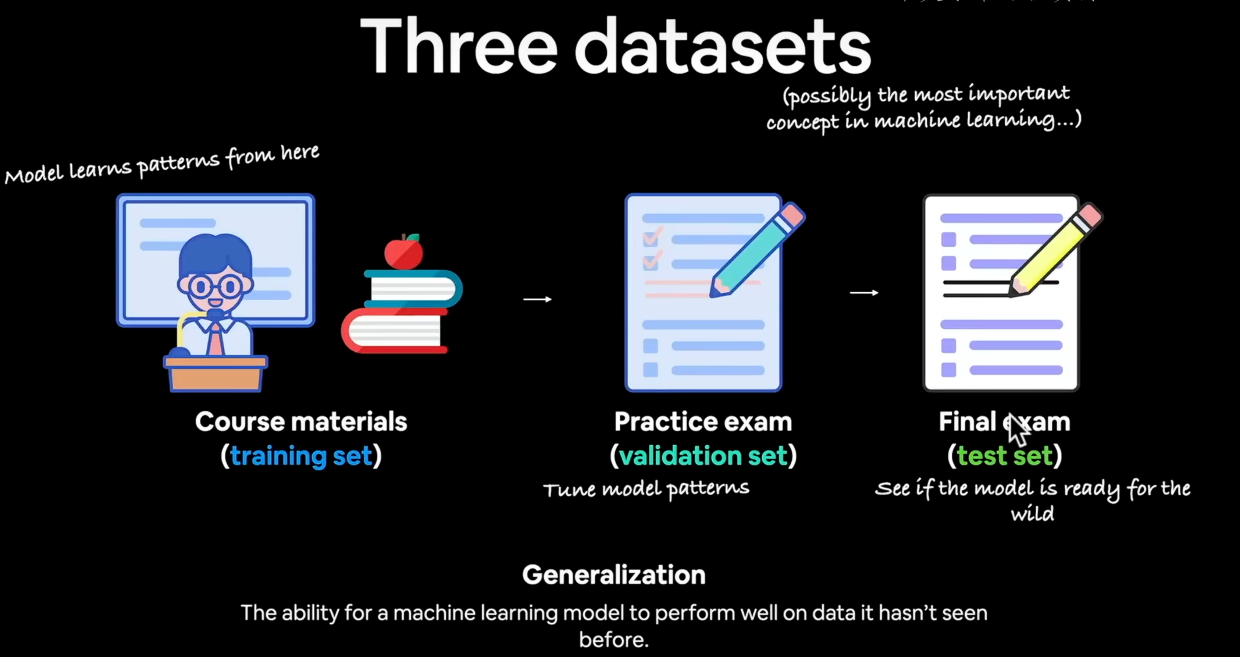

We split datasets into 3 parts in general.

Training set(60%-80%) and test set(10%-20%) are always used.


We will create training and test sets use above linear regression formula

In [5]:
# create train/test split
train_split = int(0.8*len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]
len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

Attention, the way we split data is obvious that there is no random.

In real process, a split without random will make training unuseful.

Imagine this case: we want to train machine to divide pictures of cat and dogs. However, all cats are in train set and all dogs are in test set. What does machine learn?

One of the most popular methods is scikit-learn `library-sklearn`. We will talk about it later.

Visualizing data is also a big question.

We give a simple example.

In [21]:
# a beginer-level example
def plot_predictions(train_data=X_train,
            train_labels=Y_train,
            test_data=X_test,
            test_labels=Y_test,
            predictions=None):
  """
  Plot training data, test data and compare with predictions.
  """
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c="b", s=12, label="Training data") #c-color s-size of point

  plt.scatter(test_data, test_labels, c="g", s=12, marker='x', label="Test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14}) # Set the legend, prop receize a dictionary with many properties

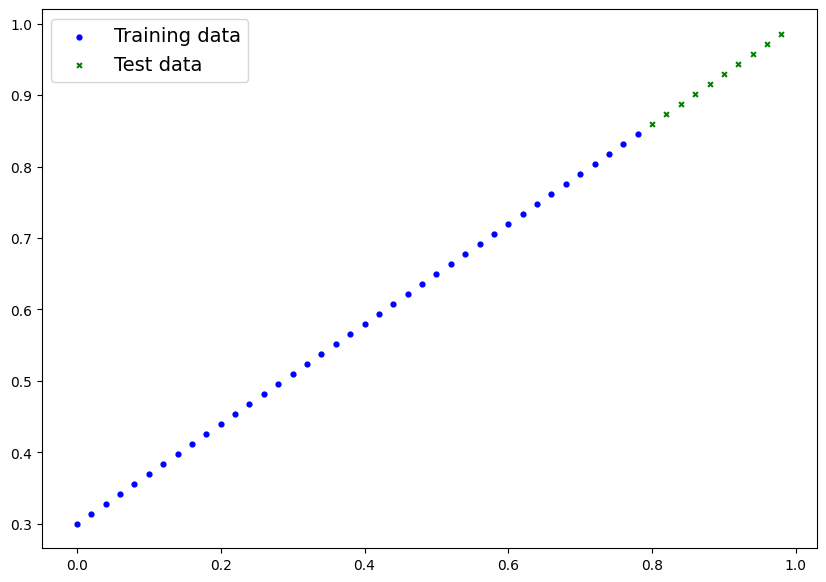

In [22]:
plot_predictions()

Then we will build a model to fell the workflow of predicting from training data.


## 2. Build model

We build our first PyTorch model.

Just a simple linear model(but powerfull in many cases!)

This is a standard process: `inherit nn.Module class` -> `use super() to call initialization method` -> `set Method in PyTorch or your own model`

https://docs.pytorch.ac.cn/docs/stable/generated/torch.nn.Module.html

In [ ]:
# Create linear regression model class
